En caso de preguntas acerca de la metodologia y desarrollo:

- **Nombre:** Sebastián Restrepo Betancúr([enviar mensaje](sebastia.restrepo.betancur@gmail.com))
- **Departamento:** Nqui

**NOTA:** Para acceder a las carpetas con el producto de datos final junto al video([Ingresar a carpeta](https://drive.google.com/drive/folders/1YQ0sIWWTrtdUkU40rrYxwiAQS8_YhOus?usp=drive_link))

<center>
    <img src="https://nuvei.com/wp-content/uploads/2021/06/nequi.png" width="500" alt="logo" />
</center>


# Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Tabla de proyecto](#0)<br>
2.  [Preguntas a resolver](#0)<br>
3.  [Creación de entorno](#0)<br>
4.  [Analisis basico y visualización](#0)<br>
5.  [Procesos de ETL](#0)<br>
6.  [Analisis y limpieza de datos](#0)<br>
7.  [Propuesta producto de datos](#0)<br>
</div>


# Librerias necesarias

In [1]:
# Bibliotecas extra:
#!pip install IPython
#!pip install plotly
# Bibliotecas necesarios:
import numpy as np # Para trabajar con vectores y matrices
from matplotlib import pyplot as plt # Para graficar
import pandas as pd # Para trabajar con bases de datos
import seaborn as sns # Mejores Graficos
from scipy import stats
from pmdarima.arima import auto_arima
from datetime import datetime
# import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import patsy as dmatrix
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from patsy import dmatrices, dmatrix, demo_data
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from IPython.display import display, HTML # Para varias salidas en data_frame y código
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
import spark
import pyspark
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql import SparkSession
import pylab as pl
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos
# Funciones auxiliar: Permite esconder el codigo, Permite varias salidas DF/ No correr en VSC
def Boton_auxiliar(button_id):
    from IPython.display import display_html
    my_html = '''
    <center>
    <button type="button" class="btn btn-primary" id="%s" onclick="code_toggle('%s')">Ocultar código</button>
    </center>
    <script>
    function code_toggle(my_id) {
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)
def salidas(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
Boton_auxiliar("nombre1")
# Import SparkSession
from pyspark.sql import SparkSession

Ocultar código

# Preguntas a resolver:

# Creación de entorno:

Inicializamos la sesion en spark, se trabajara en spark por la simplicidad que este posee para ser trabajado con grandes volumenes de datos a diferencia de pandas, ademas que tiene muy buena incorporación con modelos de mayor cuantia

In [21]:
spark = SparkSession.builder \
    .master('local') \
    .appName('myAppName_2') \
    .config('spark.executor.memory', '5gb') \
    .config("spark.cores.max", "6") \
    .getOrCreate()

Lectura de las bases de datos

In [3]:
df = spark.read.parquet('Bases_datos/sample_data_0006_part_00.parquet')
df_2=spark.read.parquet('Bases_datos/sample_data_0007_part_00 (1).parquet')

## Analisis Basico y visualización:

Visualización de la tabla 1 para los primeros 5 registros:

In [4]:
df.show(5)

+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+----------------+
|         merchant_id|                 _id|          subsidiary|   transaction_date|      account_number|             user_id|transaction_amount|transaction_type|
+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+----------------+
|075d178871d8d4850...|aa8dacff663072244...|824b2af470cbe6a65...|2021-09-12 13:32:03|648e257c9d74909a1...|ba42d192a145583ba...|      178.33365037|         CREDITO|
|075d178871d8d4850...|a53bb81bd0bba2ae2...|2d8d34be7509a6b12...|2021-09-12 13:31:58|c0b62f9046c83ea55...|5cfff960ea6d732c1...|       35.66673007|         CREDITO|
|075d178871d8d4850...|79f893ea65c06fe29...|5eeb18254850b21af...|2021-09-12 13:31:56|872d10143fc0ac7d5...|c97e63a92c82c7217...|      142.66692029|         CREDITO|
|075d178871d8d4850...|

Vizualización de la tabla 2 para los primeros 5 registros:

In [5]:
df_2.show(5)

+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+----------------+
|         merchant_id|                 _id|          subsidiary|   transaction_date|      account_number|             user_id|transaction_amount|transaction_type|
+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+------------------+----------------+
|075d178871d8d4850...|1cccf3eb51fe9ae64...|7428212cf0193f799...|2021-09-12 13:19:00|dd8fdb4414156566f...|388f45f8132c73860...|      118.88910024|         CREDITO|
|075d178871d8d4850...|b4bdd8e5ad6a2c299...|9d35d3b93eee57d56...|2021-09-12 13:18:54|7685f385afbbc08ac...|82dbd24adbfee4a4f...|       14.26669202|         CREDITO|
|075d178871d8d4850...|1fdacd107a477eb26...|902a37737a1b16712...|2021-09-12 13:18:12|b59df7a42445e88ee...|ea9323f9e24171e47...|       23.77782004|         CREDITO|
|075d178871d8d4850...|

Definimos el volumen de la información que se posee, el esquema de los datos que se tienen:

In [6]:
print(f'las dimensiones de las tablas son iguales a {df_2.count()}, {df.count()}')

las dimensiones de las tablas son iguales a 10758500, 10758418


Esquema 1:

In [7]:
df.printSchema()

root
 |-- merchant_id: string (nullable = true)
 |-- _id: string (nullable = true)
 |-- subsidiary: string (nullable = true)
 |-- transaction_date: timestamp (nullable = true)
 |-- account_number: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- transaction_amount: decimal(24,8) (nullable = true)
 |-- transaction_type: string (nullable = true)



Esquema 2:

In [8]:
df_2.printSchema()

root
 |-- merchant_id: string (nullable = true)
 |-- _id: string (nullable = true)
 |-- subsidiary: string (nullable = true)
 |-- transaction_date: timestamp (nullable = true)
 |-- account_number: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- transaction_amount: decimal(24,8) (nullable = true)
 |-- transaction_type: string (nullable = true)



Dado que las dimensiones del archivo parquet es bastante grande se desarrollaran todos los modelos a partir de la libreria spark, primero importante mirar como es el comportamiento de las transacciones, ¿que tipos hay?, valores faltantes, procesos de ETL y analisis exploratorio simple con las categorias de manera univariada para despues pasar a entregar un producto

# Procesos de ETL:

Creamos bases temporales para ser trabajados en sql con la funcionalidad en spark:

In [9]:
# Creación de archivo temporal para trabajar más rapidamente con sql
df.createOrReplaceTempView("mi_tabla")
df_2.createOrReplaceTempView("mi_tabla_2")

Primero comparamos la cantidad de valores nulos en el dataframe, analizamos si se tienen que eliminar o hacer un preprocesamiento del mismo, esto por buenas practicas es lo mas recomendable en cualquier caso que se tenga como finalidad un producto de datos

In [10]:
# Primer dataset
especial=['merchant_id','_id','subsidiary','account_number','user_id','transaction_amount','transaction_type']
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in especial]).show()

+-----------+---+----------+--------------+-------+------------------+----------------+
|merchant_id|_id|subsidiary|account_number|user_id|transaction_amount|transaction_type|
+-----------+---+----------+--------------+-------+------------------+----------------+
|          0|  0|         0|             0|      0|                 0|               0|
+-----------+---+----------+--------------+-------+------------------+----------------+



In [11]:
# Segundo dataset
especial=['merchant_id','_id','subsidiary','account_number','user_id','transaction_amount','transaction_type']
df_2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in especial]).show()

+-----------+---+----------+--------------+-------+------------------+----------------+
|merchant_id|_id|subsidiary|account_number|user_id|transaction_amount|transaction_type|
+-----------+---+----------+--------------+-------+------------------+----------------+
|          0|  0|         0|             0|      0|                 0|               0|
+-----------+---+----------+--------------+-------+------------------+----------------+



Dado que esta limpio basta con partir la base de datos

# Analisis y limpieza de datos:

El siguiente sera un analisis previo de las bases, este sera mas extenso en en **power bi** que es la propuesta como producto final de datos, en esta parte solo se mostrara por tablas para un analisis mas profundo se acude a revisar los respectivos tableros, el siguiente solo sirve para poner en contexto cada aspecto de las dos tablas para despues pasar a un analisis posterior mas amplio, el siguiente abarca analisis univariado unicamente para ello revisar el excel:

Cantidad de transacciones por tipo:

In [44]:
tabla=df.groupBy('transaction_type').count().toPandas()
tabla_2=df_2.groupBy('transaction_type').count().toPandas()
salidas([tabla,tabla_2],['transacciones por tipo tabla_1','transacciones por tipo parte 2'])

,transaction_type,count
0,DEBITO,8591289
1,CREDITO,2167129
,transaction_type,count
0,DEBITO,8592438
1,CREDITO,2166062


Conteo por sedes(Las primeras 20):

In [74]:
resultado=spark.sql('select subsidiary,count(*) as conteo_sedes from mi_tabla group by subsidiary order by conteo_sedes desc limit 20')
resultado_2=spark.sql('select subsidiary,count(*) as conteo_sedes from mi_tabla_2 group by subsidiary order by conteo_sedes desc limit 20')
salidas([resultado.toPandas(),resultado_2.toPandas()],['sedes por tipo tabla_1','Sedes por tipo tabla_2'])

,subsidiary,conteo_sedes
0,f54e0b6b32831a6307361ed959903e76,357448
1,8c52a2d7745e37bcee79717300f796e3,170510
2,d4b621a24cc03e3f92155a7e241fa1c3,165438
3,dff70ce33784a932ce4a7efc81a43863,122420
4,d4b31b123120a4eefd51ba95975f2ae4,50786
5,4ecafb5dcecd6027257e8af4d9c82853,30557
6,3458b243beebecf55605ca649b6b2ea5,28389
7,4f511a84e8c4b1c09991e0d876e880ce,21967
8,fee20d2f0753125f11b4376da5dbad4c,21698
9,464139dd69c67ebf50f2f946bc12513e,15025


Conteo por comercios mas frecuentes:

In [75]:
resultado=spark.sql('select merchant_id,count(*) as conteo_aliado from mi_tabla group by merchant_id order by conteo_aliado desc limit 20')
resultado_2=spark.sql('select merchant_id,count(*) as conteo_aliado from mi_tabla_2 group by merchant_id order by conteo_aliado desc limit 20')
salidas([resultado.toPandas(),resultado_2.toPandas()],['aliado por tipo tabla_1','aliado por tipo tabla_2'])

,merchant_id,conteo_aliado
0,817d18cd3c31e40e9bff0566baae7758,7267100
1,838a8fa992a4aa2fb5a0cf8b15b63755,1876700
2,075d178871d8d48502bf1f54887e52fe,1614618
,merchant_id,conteo_aliado
0,817d18cd3c31e40e9bff0566baae7758,7267200
1,838a8fa992a4aa2fb5a0cf8b15b63755,1876700
2,075d178871d8d48502bf1f54887e52fe,1614600


# Propuesta producto de datos

Para la solución basta con encontrar como mezclar los dos dataframes, de manera eficiente podemos hacerlo a continuación::

In [14]:
completo= df.union(df_2)
print(f'El data frame como resultado de los dos tiene un total de registros de {completo.count()}')

El data frame como resultado de los dos tiene un total de registros de 21516918


Creación de base temporal:

In [15]:
completo.createOrReplaceTempView("alertas")

In [16]:
nuevas=spark.sql("with t1 as (select *,cast(concat(YEAR(transaction_date),'-',month(transaction_date),'-',day(transaction_date)) as string) \
                 as fecha from alertas) \
                select user_id as Cuenta_de_usuario,fecha as fecha_transado,count(*) as cantidad_de_transacciones,sum(transaction_amount) as cantidad_transada,\
                min(transaction_amount) as minimo_transado,max(transaction_amount) as maximo_transado  from t1 \
                group by fecha_transado,Cuenta_de_usuario HAVING cantidad_de_transacciones > 1 order by cantidad_de_transacciones desc")
nuevas.show(20)

+--------------------+--------------+-------------------------+-----------------+---------------+---------------+
|   Cuenta_de_usuario|fecha_transado|cantidad_de_transacciones|cantidad_transada|minimo_transado|maximo_transado|
+--------------------+--------------+-------------------------+-----------------+---------------+---------------+
|71aa1651d9adc0b22...|      2021-2-7|                      414|    7775.26274294|     5.94445501|   261.55602054|
|01c2e0350f7d77f40...|      2021-2-5|                      400|    2378.98040532|     5.94564390|     6.18223321|
|5e674596af22a66e8...|      2021-2-7|                      399|    4564.84686882|     5.94445501|   143.14247669|
|789c59c87fee33218...|     2021-1-29|                      394|    2368.27087599|     5.94445501|    15.45558303|
|01c2e0350f7d77f40...|     2021-1-31|                      393|    2337.10528647|     5.94564390|     5.94802168|
|04b054b61ff8cf57e...|     2021-1-31|                      385|    2291.52677156|     5.

Guardamos el nuevo dataset construido en un archivo parquet(Este es el que se consolida para pertenecer al tablero de alertas)

In [17]:
print(f'cantidad de registros con alertas {nuevas.count()}')

cantidad de registros con alertas 1959712


Dadp que no son muchos registros se hara todo directamente en pandas ademas con el fin de mostrar algunos gráficos exploratorios

In [53]:
# Lo ideal es hacerlo con hadoop por amenizar se hara todo desde pandas
# aunque con un servidor externo sera mas facil como una servicio para guardar data sets
# nuevas.write.mode("overwrite").parquet("Bases_datos/archivo.parquet")
ejercicio=nuevas.toPandas()

se guarda el archivo para su USO en el power bi

In [29]:
ejercicio.to_csv('ejercicio.csv')

Mostramos el analisis inicial

In [61]:
ejercicio.head()

,Cuenta_de_usuario,fecha_transado,cantidad_de_transacciones,cantidad_transada,minimo_transado,maximo_transado
0,71aa1651d9adc0b226107084fba3d71c,2021-2-7,414,7775.26274294,5.94445501,261.55602054
1,01c2e0350f7d77f4084502861b4989ff,2021-2-5,400,2378.98040532,5.94564390,6.18223321
2,5e674596af22a66e826bf15b2a363cce,2021-2-7,399,4564.84686882,5.94445501,143.14247669
3,789c59c87fee33218ac916dbece2ed4e,2021-1-29,394,2368.27087599,5.94445501,15.45558303
4,01c2e0350f7d77f4084502861b4989ff,2021-1-31,393,2337.10528647,5.94564390,5.94802168


Se hace los respectivos gráficos exploratorios

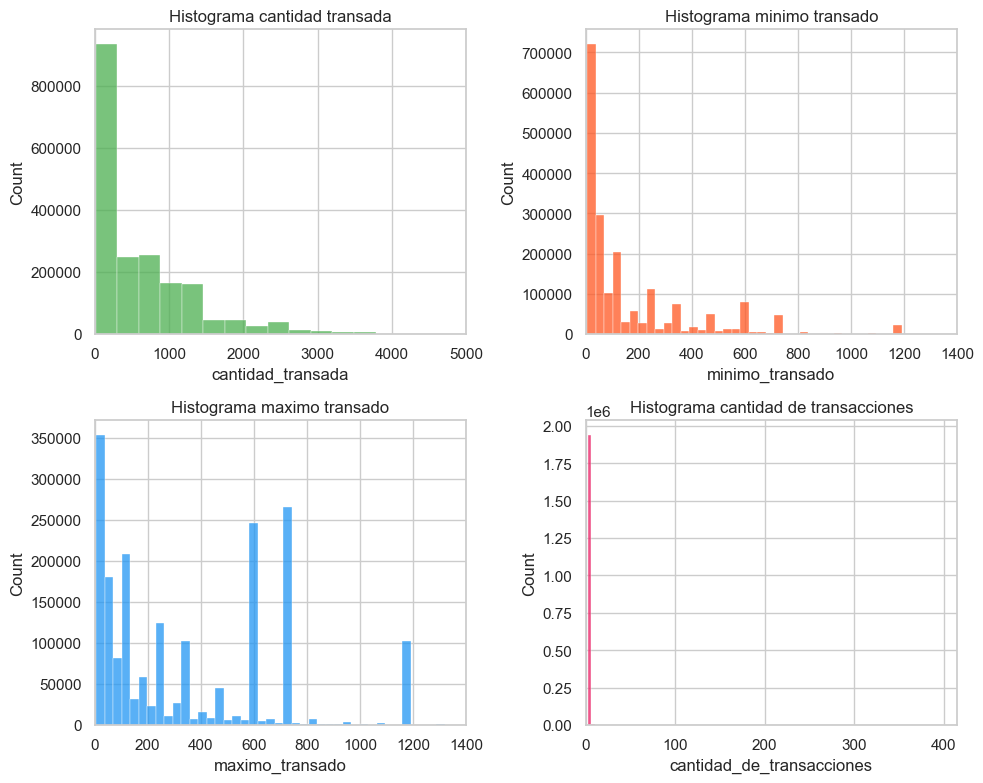

In [68]:
ejercicio['cantidad_transada']=ejercicio.cantidad_transada.astype('float')
ejercicio['minimo_transado']=ejercicio.minimo_transado.astype('float')
ejercicio['maximo_transado']=ejercicio.maximo_transado.astype('float')
ejercicio['cantidad_de_transacciones']=ejercicio.cantidad_de_transacciones.astype('int')

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.histplot(ejercicio['cantidad_transada'], bins=100, kde=False, color='#4CAF50', ax=axs[0, 0])
axs[0, 0].set_title('Histograma cantidad transada')
axs[0, 0].set_xlim(0, 5000)

sns.histplot(ejercicio['minimo_transado'], bins=100, kde=False, color='#FF5722', ax=axs[0, 1])
axs[0, 1].set_title('Histograma minimo transado')
axs[0, 1].set_xlim(0, 1400)

sns.histplot(ejercicio['maximo_transado'], bins=100, kde=False, color='#2196F3', ax=axs[1, 0])
axs[1, 0].set_title('Histograma maximo transado')
axs[1, 0].set_xlim(0, 1400)

sns.histplot(ejercicio['cantidad_de_transacciones'], bins=100, kde=False, color='#E91E63', ax=axs[1, 1])
axs[1, 1].set_title('Histograma cantidad de transacciones')
axs[1, 1].set_xlim(0, 415)

plt.tight_layout()

# Mostrar la figura
plt.show()

Cerrar entorno spark

In [76]:
spark.stop()